<a href="https://colab.research.google.com/github/orinbou/MathPythonColab/blob/main/chapter/%E7%AC%AC7%E5%9B%9E%E3%80%80%E7%A9%8D%E5%88%86%E6%B3%95%E3%81%AE%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%82%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%81%97%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標1： 台形公式を使って積分を行う

In [ ]:
def parabolic(x):
  return x**2

In [ ]:
import numpy as np
def integral(func, xmin, xmax, h):
  result = 0
  for x in np.arange(xmin, xmax, h):
    result += (func(x) + func(x+h)) * h / 2
  return result

In [ ]:
integral(parabolic, 0, 1, 0.001)

0.33333349999999984

In [ ]:
import numpy as np
def integral2(func, xmin, xmax, count):
  result = 0
  rep, h = np.linspace(xmin, xmax, count, endpoint=False, retstep=True)
  for x in rep:
    result += (func(x) + func(x+h)) * h / 2
  return result

In [ ]:
integral2(parabolic, 0, 1, 1000)

0.33333349999999984

# 目標2： シンプソンの公式を使って積分を行う

In [ ]:
import numpy as np
def simpson(func, xmin, xmax, h):
  result = 0
  w = h * 2
  for x in np.arange(xmin, xmax, w):
    result += (func(x) + 4*func(x+h) + func(x+w)) * (h / 3)
  return result

In [ ]:
simpson(parabolic, 0, 1, 0.001)

0.3333333333333334

# 目標3： モンテカルロ法により定積分の近似計算を行う

In [ ]:
import numpy as np
def monte(n):
  np.random.seed(0)
  count = 0
  for i in range(n):
    x = np.random.random()
    y = np.random.random()
    if y < x**2:
      count += 1
  return count / n

In [ ]:
monte(1000)

0.327

In [ ]:
monte(100000)

0.33347

In [ ]:
import numpy as np
def monte_mkdata(n):
  np.random.seed(0)
  px = []
  py = []
  for i in range(n):
    x = np.random.random()
    y = np.random.random()
    if y < x**2:
      px.append(x)
      py.append(y)
  return px, py

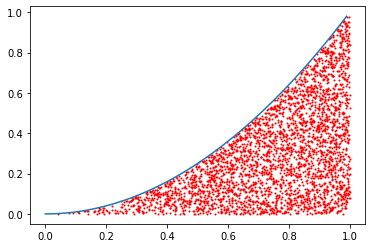

In [ ]:
import matplotlib.pyplot as plt
# 散布図を描画
plt.scatter(*monte_mkdata(10000), s=1, c="red")
xrange = np.arange(0, 1, 0.01)
plt.plot(xrange, xrange**2)
plt.show()

# 目標4： モンテカルロ法により標準正規分布のサンプリングを行う

In [ ]:
import numpy as np
def stdnorm(x):
  return 1/np.sqrt(2*np.pi) * np.exp(-(x**2/2))

In [ ]:
def monte_mksample(func, xmin, xmax, ymin, ymax, n):
  np.random.seed(0)
  data = [] # 網掛け部分に入ったxを記録するリスト
  for i in range(n):
    x = np.random.uniform(xmin, xmax) # xmin～xmaxの一様乱数
    y = np.random.uniform(ymin, ymax) # ymin～ymaxの一様乱数
    if y < func(x):
      data.append(x)
  return data

In [ ]:
ymax = stdnorm(0) # x=0の時yは最大となる
data = monte_mksample(stdnorm, -6, 6, 0, ymax, 10000)
# print(data)

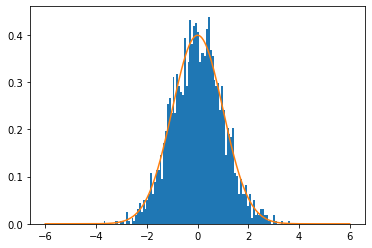

In [ ]:
import matplotlib.pyplot as plt
# ヒストグラムの作成
plt.hist(data, bins=100, density=True)
xrange = np.arange(-6, 6, 0.01)
y = [stdnorm(x) for x in xrange]
plt.plot(xrange, y)
plt.show()

In [ ]:
import numpy as np

x = np.array(data) # dataをNumPyの配列にしておく
np.count_nonzero((-2 <= x) & (x < 2)) / len(x)

0.9514699020065329

# 練習問題と解答例

## （1）台形公式とシンプソンの公式で標準正規分布の累積確率を求める

In [ ]:
integral(stdnorm, -2, 2, 0.001)

0.9544997181067352

In [ ]:
simpson(stdnorm, -2, 2, 0.001)

0.9544997361036403

シンプソンの公式の方が良い近似値となっている

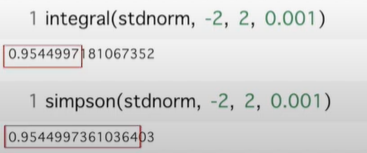

## （2）曲線の長さを求める

In [ ]:
import numpy as np
def derivative(f, x, h):
  return (f(x+h) - f(x)) / h

def parabolic(x):
  return x**2

def linelength(func, xmin, xmax, h):
  length = 0
  for x in np.arange(xmin, xmax, h):
    length += np.sqrt(h**2 + (h * derivative(func, x, h))**2)
  return length

In [ ]:
linelength(parabolic, 0, 1, 0.0001)

1.4789428567991607

## （3）マルコフ連鎖モンテカルロ法により標準正規分布のサンプリングを行う

In [ ]:
def metro(n):
  np.random.seed(0)
  x = 0
  data = []

  for i in range(n):
    xnext = x + np.random.uniform(-0.5, 0.5) # 次の値の候補
    alpha = min(1, stdnorm(xnext) / stdnorm(x)) # 次の値の候補を採用する確率α
    r = np.random.random()
    # rがα以下ならxnextを次の値とする（確率αで次の値となる）
    # そうでなければ何もしない（確率1-αで今回の値をそのまま次の値とする）
    if r <= alpha:
      x = xnext
    data.append(x)
  return data

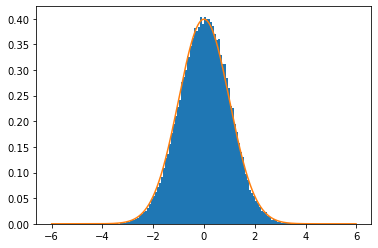

In [ ]:
import matplotlib.pyplot as plt
data = metro(100000) # 関数metroを使って標準正規分布のデータを作成
# ヒストグラムの作成
plt.hist(data, bins=100, density=True)
xrange = np.arange(-6, 6, 0.01)
y = [stdnorm(x) for x in xrange]
plt.plot(xrange, y)
plt.show()

In [ ]:
x = np.array(data)
for sigma in range(1, 6):
  print(np.count_nonzero((-sigma <= x) & (x < sigma)) / len(x))

0.6916
0.95867
0.99816
1.0
1.0
